![](2022-06-21-13-48-58.png)

Avaliação P2 - Vacinação no DF
=====
## Base de dados completa

---
####  Grupo 2: **Robson Ricardo, Candice Escorcio, Arquimedes Aquides, Victor Kauan**
---

### Importação das bibliotecas necessárias

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Criação do data frame e importação dos dados

In [9]:
# Importação da base de dados e criação do data frame
vacinacao_DF = pd.read_sas('C:\\Users\\jobsr\\Downloads\\vacinacao_53_df_total.sas7bdat', encoding="latin1")

---
# Ajustes no data frame 🧹

In [10]:
# Transformação da coluna 'paciente_dataNascimento' em Datetime

vacinacao_DF['paciente_dataNascimento']=pd.to_datetime(vacinacao_DF['paciente_dataNascimento'], format='%Y/%m/%d')

In [ ]:
# Transformar a coluna 'Idade' em numérico

vacinacao_DF['paciente_idade'] = vacinacao_DF['paciente_idade'].astype('int64')

---
# Sobre os dados 🤔

### Verificar o tipo das variáveis

In [21]:
# Verificar o tipo das variáveis
vacinacao_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6260948 entries, 0 to 6260947
Data columns (total 36 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   paciente_idade                   object        
 1   paciente_dataNascimento          datetime64[ns]
 2   paciente_enumSexoBiologico       object        
 3   paciente_racaCor_codigo          object        
 4   paciente_racaCor_valor           object        
 5   paciente_endereco_coIbgeMunicip  object        
 6   paciente_endereco_coPais         object        
 7   paciente_endereco_nmMunicipio    object        
 8   paciente_endereco_nmPais         object        
 9   paciente_endereco_uf             object        
 10  paciente_endereco_cep            object        
 11  paciente_nacionalidade_enumNaci  object        
 12  estabelecimento_valor            object        
 13  estabelecimento_razaoSocial      object        
 14  estalecimento_noFantasia         o

---
### Amostra dos dados contidos no data frame

In [22]:
# Para visualizar todas as colunas do data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [23]:
vacinacao_DF.head()

,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicip,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNaci,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codig,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,Vacina_DataAplicacao_Ano,Vacina_DataAplicacao_Mes,Vacina_DataAplicacao_Dia,Vacina_DataAplicacao_Ano_Mes,Vacina_DataAplicacao_Mes_Ano,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,Vacinado
0,13,2007-12-13,F,99,SEM INFORMACAO,530010,10,BRASILIA,BRASIL,DF,None,B,0010936,UNIDADE BASICA DE SAUDE N 03 DE TAGUATINGA,UBS 03 TAGUATINGA,530010,BRASILIA,DF,000206,Pessoas de 12 a 17 anos,2,Faixa Etária,FM3884,PFIZER,Organization/28290,2021-12-09,2021,12,09,2021-12,12,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI,1.0
1,57,1964-07-04,F,99,SEM INFORMACAO,530010,10,BRASILIA,BRASIL,DF,70773,B,0010723,UNIDADE BASICA DE SAUDE N 2 ASA NORTE,UBS 2 ASA NORTE,530010,BRASILIA,DF,000201,Pessoas de 18 a 64 anos,2,Faixa Etária,219VCD289W,ASTRAZENECA/FIOCRUZ,Organization/149,2022-03-04,2022,03,04,2022-03,03,Reforço,85,COVID-19 ASTRAZENECA/FIOCRUZ - COVISHIELD,Novo PNI,1.0
2,52,1968-12-26,F,03,PARDA,530010,10,BRASILIA,BRASIL,DF,71050,B,0011266,UNIDADE BASICA DE SAUDE N 2 DO GUARA,UBS 02 GUARA,530010,BRASILIA,DF,000201,Pessoas de 18 a 64 anos,2,Faixa Etária,FF8840,PFIZER,Organization/00394544000851,2021-09-14,2021,09,14,2021-09,09,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI,1.0
3,23,1998-01-11,F,03,PARDA,530010,10,BRASILIA,BRASIL,DF,72220,B,0011053,UNIDADE BASICA DE SAUDE N 9 DA CEILANDIA,UBS 9 CEILANDIA,530010,BRASILIA,DF,000201,Pessoas de 18 a 64 anos,2,Faixa Etária,32010BD,PFIZER,Organization/00394544000851,2021-10-21,2021,10,21,2021-10,10,2ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI,1.0
4,34,1987-04-05,F,01,BRANCA,530010,10,BRASILIA,BRASIL,DF,71805,B,7161158,HOSPITAL MILITAR DE AREA DE BRASILIA,HOSPITAL MILITAR DE AREA DE BRASILIA,530010,BRASILIA,DF,000201,Pessoas de 18 a 64 anos,2,Faixa Etária,FD7207,PFIZER,Organization/00394544000851,2021-08-09,2021,08,09,2021-08,08,1ª Dose,87,COVID-19 PFIZER - COMIRNATY,Novo PNI,1.0


---
### Quantas pessoas já foram vacinadas no DF 💉

In [24]:
# Cálculo de quantas Series possui o data frame
vacinacao_DF.shape

(6260948, 36)

In [25]:
vacinacao_DF.Vacinado.sum()

6260948.0

    Este data frame possui 6.260.948 entradas, ou seja, representa 6.260.948 doses aplicadas no DF.

##### ⚠️ PARTE ADICIONADA PARA A BASE DE DADOS COMPLETA
Os dados consideram todas as doses aplicadas. Para descobrir o total de pessoas vacinadas, é preciso separar por dose.

In [76]:
# Vacinados com a primeira dose
primeiraDose = len(vacinacao_DF[vacinacao_DF['vacina_descricao_dose'] == '1ª Dose'])

# Vacinados com a dose única
doseUnica = len(vacinacao_DF[vacinacao_DF['vacina_descricao_dose'] == 'Única'])

# Exibe os valores
print(f'Vacinados com a 1ª Dose: {primeiraDose}')
print(f'Vacinados com a Dose Única: {doseUnica}')

Vacinados com a 1ª Dose: 2476758
Vacinados com a Dose Única: 395


Considerando que, para receber a segunda dose e as demais doses de reforço, a pessoa deve ter tomado a primeira dose ou a dose única, podemos considerar que a quantidade indíviduos vacinados no DF é:

In [75]:
individuosVacinados = primeiraDose + doseUnica
print(f'Total de indivíduos vacinados no DF: {individuosVacinados}')

Total de indivíduos vacinados no DF: 2477153


    Portanto, 2.477.153 pessoas se vacinaram no DF.

---
### Meses com maior vacinação 📆

In [26]:
# Meses com maior vacinação no DF
vacinacao_DF['Vacina_DataAplicacao_Mes'].value_counts()

08    959248
09    610462
10    575676
07    566032
06    522065
04    470913
03    469577
01    459657
02    440085
05    426875
11    415635
12    344723
Name: Vacina_DataAplicacao_Mes, dtype: int64

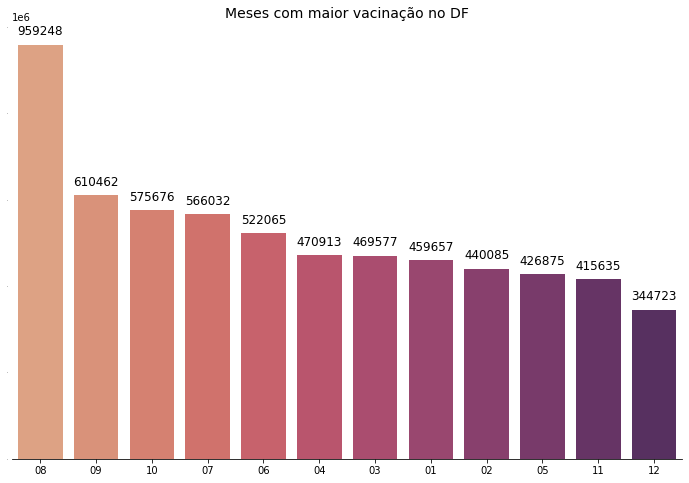

In [27]:
# Gráfico dos meses com maior vacinação no DF
fig, ax = plt.subplots(figsize=(12,8))
sns.despine(left=False)
splot = sns.countplot(x='Vacina_DataAplicacao_Mes_Ano', order=vacinacao_DF['Vacina_DataAplicacao_Mes_Ano'].value_counts().index, data=vacinacao_DF, palette='flare')
plt.title('Meses com maior vacinação no DF',fontsize=14)
plt.ylabel('')
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

    O mês com maior vacinação no DF, considerando os anos de 2020 a 2022, foi o mês de agosto (08), com 959.248 vacinados, seguido por setembro (09) e outubro (10).

### Pacientes de outros Estados que foram vacinados no DF 🗺️

In [29]:
# Contagem de candidatos por Cor/Raça
outrosEstados = vacinacao_DF[vacinacao_DF.paciente_endereco_uf !='DF'].groupby('paciente_endereco_uf')['paciente_endereco_uf'].count().sort_values(ascending=False)
outrosEstados

paciente_endereco_uf
GO      333526
MG       94028
BA       70026
SP       59024
MA       52716
PI       50651
RJ       45321
CE       27479
PB       18092
PA       17622
TO       16925
PE       15311
RS       15198
PR       13422
RN       10395
SC        9518
MT        9307
MS        7647
AM        6736
ES        5837
AL        4369
RO        3766
SE        3721
XX        3290
RR        2891
AC        2800
AP        2135
None       355
Name: paciente_endereco_uf, dtype: int64

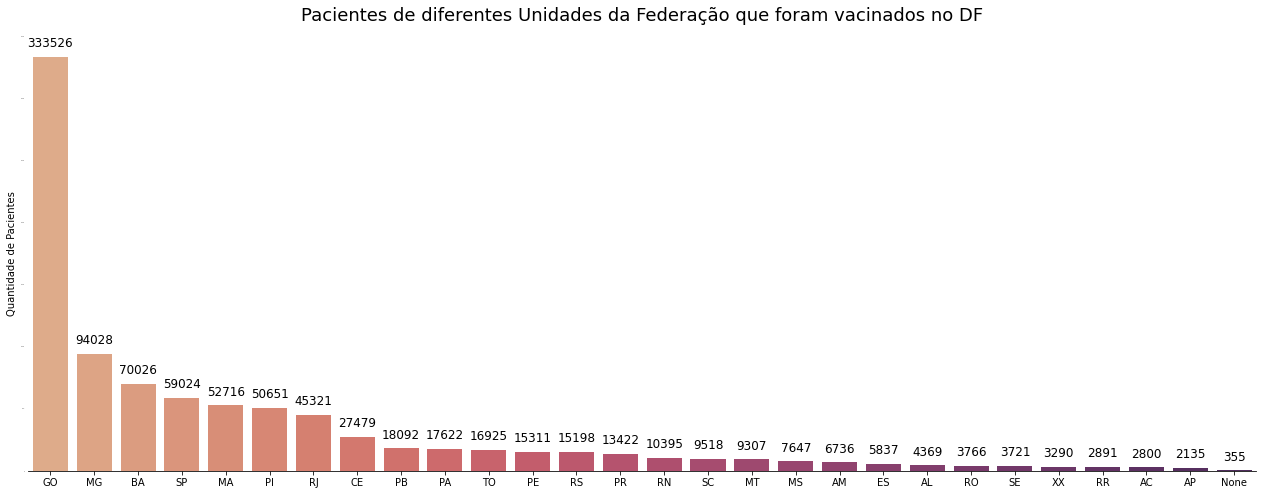

In [31]:
# Geração do gráfico de pessoas vacinadas por UF
fig, ax = plt.subplots(figsize=(22,8))
splot = sns.countplot(x='paciente_endereco_uf', order=outrosEstados.index, data=vacinacao_DF, palette='flare')
plt.title('Pacientes de diferentes Unidades da Federação que foram vacinados no DF',fontsize=18, pad=15)
plt.ylabel('Quantidade de Pacientes')
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

### Vacinados por Raça/Cor 🧑🏼‍🦱🧑🏾‍🦱

In [32]:
# Total de pacientes por raça/cor

vacinacao_DF['paciente_racaCor_valor'].value_counts()

SEM INFORMACAO    2502088
PARDA             1818165
BRANCA            1078120
AMARELA            661645
PRETA              198371
INDIGENA             2554
Name: paciente_racaCor_valor, dtype: int64

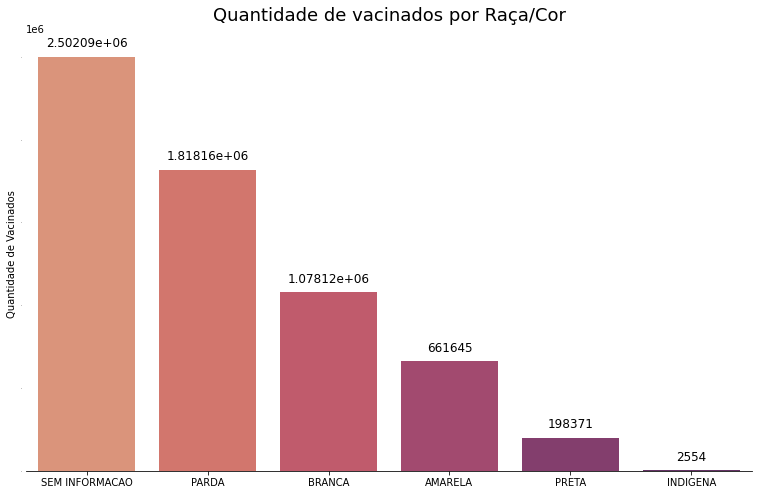

In [39]:
# Geração do gráfico de vacinados por Cor/Raça
fig, ax = plt.subplots(figsize=(13,8))
splot = sns.countplot(x='paciente_racaCor_valor', order=vacinacao_DF['paciente_racaCor_valor'].value_counts().index, data=vacinacao_DF, palette='flare')
plt.title('Quantidade de vacinados por Raça/Cor',fontsize=18, pad=15)
plt.ylabel('Quantidade de Vacinados')
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

### Vacinados por Sexo 👩‍🦰🧔‍♂️

In [40]:
vacinacao_DF['paciente_enumSexoBiologico'].value_counts()

F    3409674
M    2851263
I          9
Name: paciente_enumSexoBiologico, dtype: int64

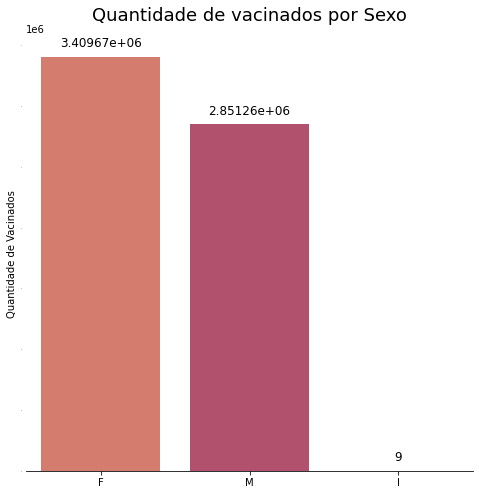

In [41]:
# Geração do gráfico de vacinados por Sexo
fig, ax = plt.subplots(figsize=(8,8))
splot = sns.countplot(x='paciente_enumSexoBiologico', order=vacinacao_DF['paciente_enumSexoBiologico'].value_counts().index, data=vacinacao_DF, palette='flare')
plt.title('Quantidade de vacinados por Sexo',fontsize=18, pad=15)
plt.ylabel('Quantidade de Vacinados')
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

### Vacinados por Fabricante da Vacina 💉

In [42]:
vacinacao_DF['vacina_fabricante_nome'].value_counts()

PFIZER                    2833613
ASTRAZENECA/FIOCRUZ       1614289
SINOVAC/BUTANTAN          1234466
JANSSEN                    358885
ASTRAZENECA                122989
Pendente Identificação      96196
Pendente Identifica??o        510
Name: vacina_fabricante_nome, dtype: int64

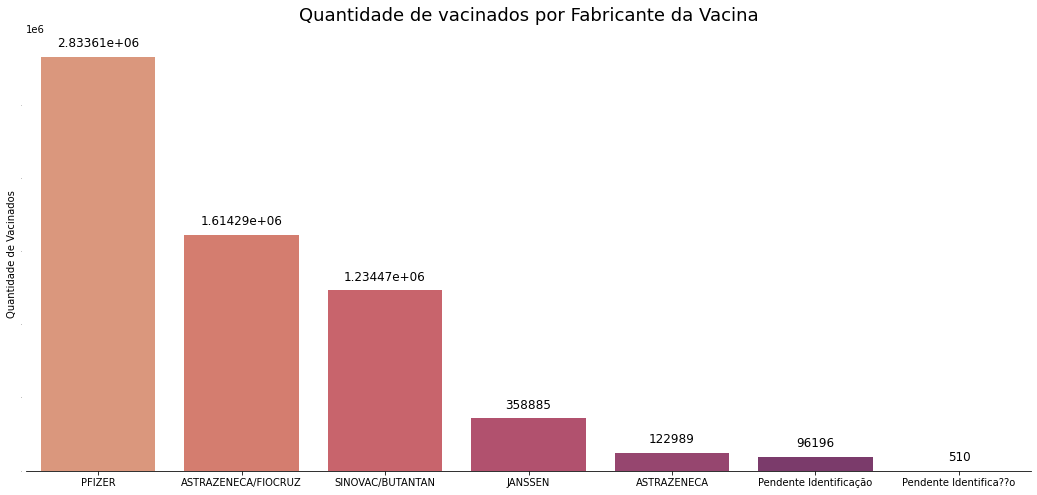

In [43]:
# Geração do gráfico de vacinados por Fabricante
fig, ax = plt.subplots(figsize=(18,8))
splot = sns.countplot(x='vacina_fabricante_nome', order=vacinacao_DF['vacina_fabricante_nome'].value_counts().index, data=vacinacao_DF, palette='flare')
plt.title('Quantidade de vacinados por Fabricante da Vacina',fontsize=18, pad=15)
plt.ylabel('Quantidade de Vacinados')
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

    A vacina mais utilizada no DF foi a Pfizer, com 44.96% das doses aplicadas. Seguida da Astrazeneca, com 26.07%.

### Quantidade de vacinados por Ano 📅

In [44]:
vacinacao_DF['Vacina_DataAplicacao_Ano'].value_counts()

2021    4811223
2022    1448637
2020       1088
Name: Vacina_DataAplicacao_Ano, dtype: int64

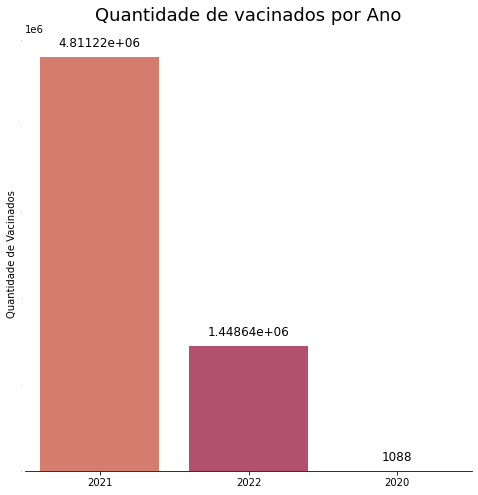

In [45]:
# Geração do gráfico de vacinados por Ano
fig, ax = plt.subplots(figsize=(8,8))
splot = sns.countplot(x='Vacina_DataAplicacao_Ano', order=vacinacao_DF['Vacina_DataAplicacao_Ano'].value_counts().index, data=vacinacao_DF, palette='flare')
plt.title('Quantidade de vacinados por Ano',fontsize=18, pad=15)
plt.ylabel('Quantidade de Vacinados')
plt.xlabel('')

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

### Vacinados por Idade 🎂

In [46]:
vacinacao_DF['paciente_idade'].value_counts()

39     123694
40     123164
41     119874
38     119387
42     117091
        ...  
1           5
112         3
114         3
113         1
122         1
Name: paciente_idade, Length: 117, dtype: int64

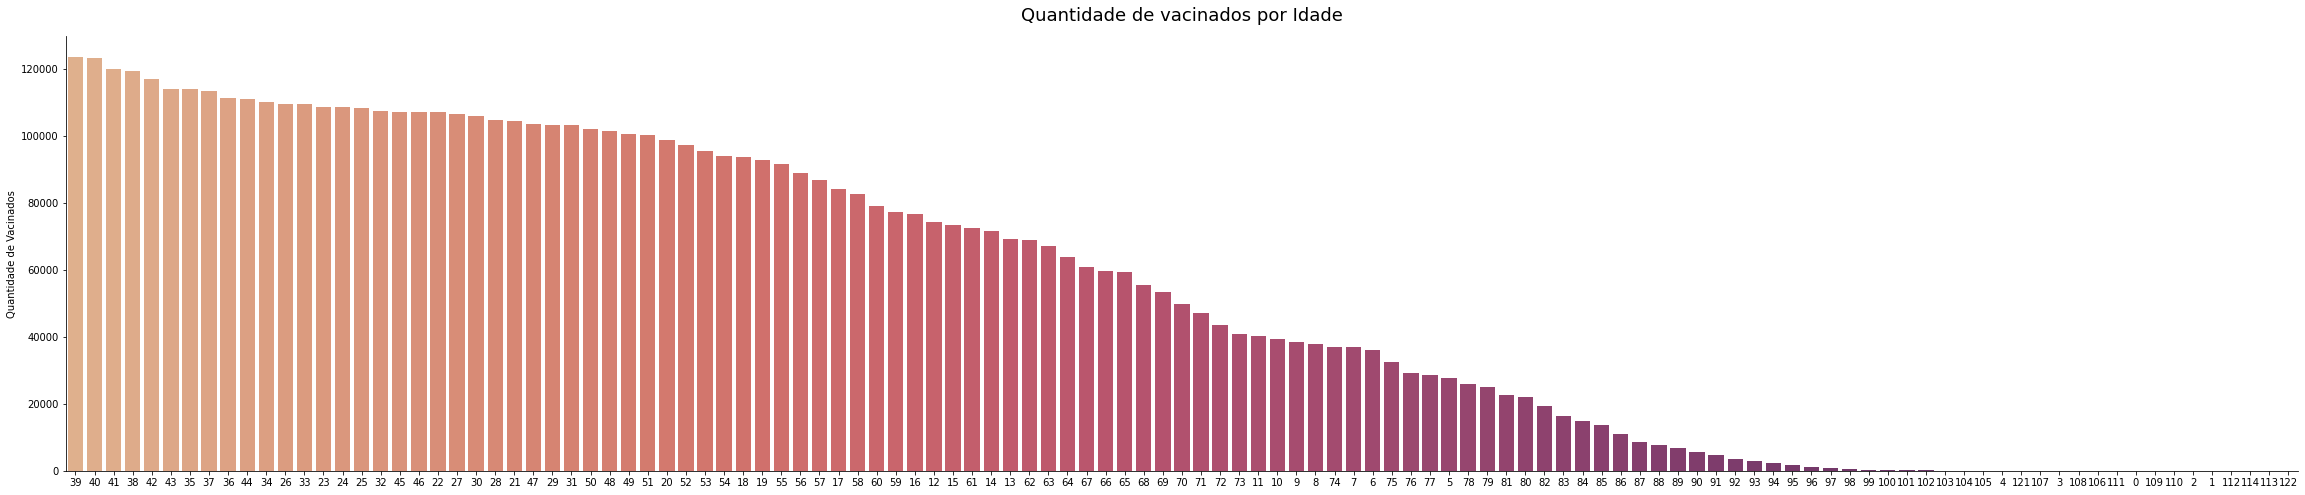

In [49]:
# Geração do gráfico de vacinados por Idade
fig, ax = plt.subplots(figsize=(40,8))
splot = sns.countplot(x='paciente_idade', order=vacinacao_DF['paciente_idade'].value_counts().index, data=vacinacao_DF, palette='flare')
plt.title('Quantidade de vacinados por Idade',fontsize=18, pad=15)
plt.ylabel('Quantidade de Vacinados')
plt.xlabel('')

sns.despine(left=False) # retirada da moldura

### Vacinados por Doses 💉

In [50]:
vacinacao_DF['vacina_descricao_dose'].value_counts()

1ª Dose                2476758
2ª Dose                2283427
Reforço                1176854
2º Reforço              207095
Dose                     62864
Dose Adicional           53344
Única                      395
2ª Dose Revacinação         94
1ª Dose Revacinação         60
3ª Dose                     54
Dose Inicial                 1
4ª Dose                      1
3ª Dose Revacinação          1
Name: vacina_descricao_dose, dtype: int64

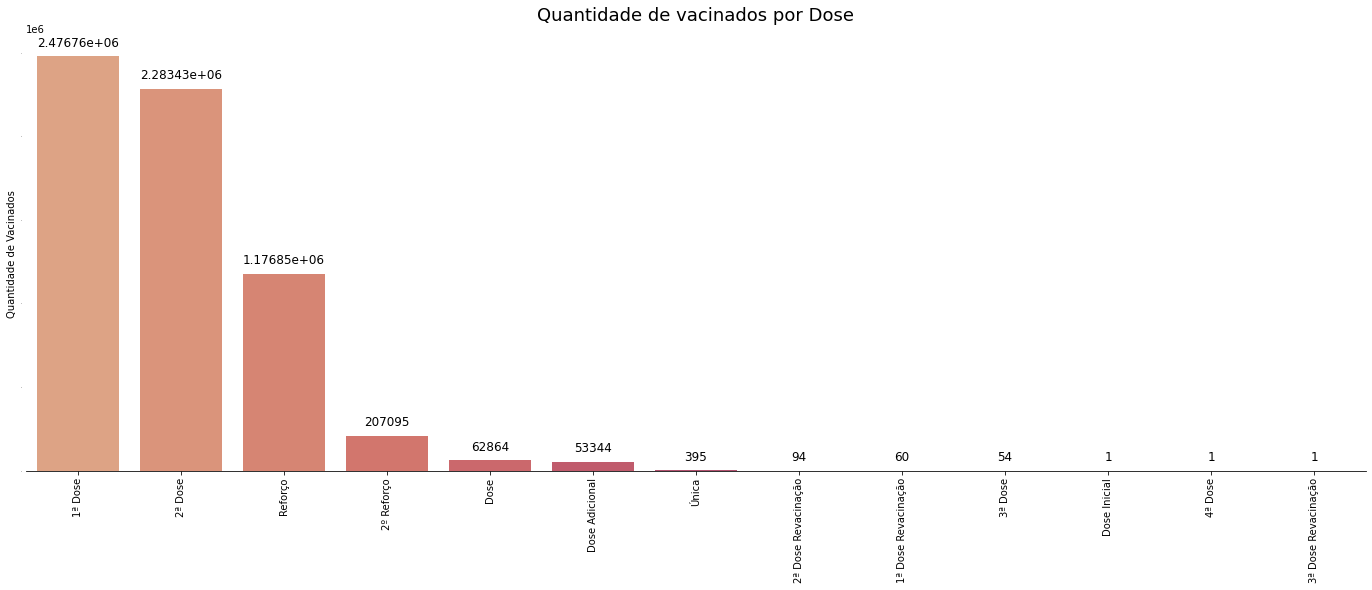

In [55]:
# Geração do gráfico de vacinados por Doses
fig, ax = plt.subplots(figsize=(24,8))
splot = sns.countplot(x='vacina_descricao_dose', order=vacinacao_DF['vacina_descricao_dose'].value_counts().index, data=vacinacao_DF, palette='flare')
plt.title('Quantidade de vacinados por Dose',fontsize=18, pad=15)
plt.ylabel('Quantidade de Vacinados')
plt.xlabel('')
plt.xticks(rotation=90)

sns.despine(left=True) # retirada da moldura
ax.bar_label(splot.containers[0],size=12, padding=7) # colocando a informação no alto de cada barra
plt.tick_params(axis ='y', labelsize=0, length = 0) # medidas do eixo y foram suprimidas

### Vacinados de 5 a 11 anos por Dose da Vacina 🧒💉

In [77]:
criancas = vacinacao_DF[vacinacao_DF.vacina_grupoAtendimento_nome=='Pessoas de 5 a 11 anos'].groupby('vacina_descricao_dose')['vacina_grupoAtendimento_nome'].count().sort_values(ascending=False)
criancas

vacina_descricao_dose
1ª Dose           153325
2ª Dose           101239
Reforço              214
2º Reforço            28
Dose Adicional        19
Dose                  17
Name: vacina_grupoAtendimento_nome, dtype: int64